In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [534]:
auto_loan_file = "../data/auto_loan_data_long.csv"
registration_file = "../data/vehicle_registration_data.csv"

# オートローンデータ
auto_loan_df = pd.read_csv(auto_loan_file, encoding='utf-8')
print(f"オートローンデータ形状: {auto_loan_df.shape}")

# 新車登録データ
registration_df = pd.read_csv(registration_file, encoding='utf-8')
print(f"新車登録データ形状: {registration_df.shape}")

オートローンデータ形状: (221289, 21)
新車登録データ形状: (54, 14)


In [535]:
# # オートローンデータ日付フォーマット変更
# def convert_contract_date(date_str):
#     try:
#         dt = pd.to_datetime(date_str, format='%d%b%Y:%H:%M:%S')
#         formatted = dt.strftime('%m/%d/%Y')
#         # 先頭ゼロを削除
#         parts = formatted.split('/')
#         month = str(int(parts[0]))
#         day = str(int(parts[1]))
#         year = parts[2]
#         return f"{month}/{day}/{year}"
#     except Exception as e:
#         print(f"日付変換エラー: {date_str} -> {e}")
#         return date_str

# # 契約年月日列を変換
# auto_loan_df['契約年月日'] = auto_loan_df['契約年月日'].apply(convert_contract_date)

In [536]:
# オートローンデータの日付変換
auto_loan_df['契約年月日'] = pd.to_datetime(auto_loan_df['契約年月日'])

# 新車のみフィルタリング
new_car_loans = auto_loan_df[auto_loan_df['新車/中古車'] == '新車'].copy()

print(f"新車オートローン件数: {len(new_car_loans)}")
new_car_loans

新車オートローン件数: 65006


,契約年月日,新車/中古車,国産車/輸入車,車両区分,ボディタイプ,メーカー,車種名_集約名,車種名,顧客数,件数,...,車輌本体価格,車輌本体価格_税込,諸費用_税込,その他費用_税込,付属品オプション費用_税込,現金価格合計,現金,下取り価格,頭金,残金_クレジット金額
0,2018-09-03,新車,国産車,軽自動車,ﾊﾞﾝ,ｽｽﾞｷ,ｴﾌﾞﾘｲ,ｴﾌﾞﾘｲﾊﾞﾝ,2,2,...,1229040.0,2698920,194340,-165888,172628,2900000,0,0,0,2900000
1,2018-09-03,新車,国産車,普通自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ｽｽﾞｷ,ｽｲﾌﾄｽﾎﾟｰﾂ,ｽｲﾌﾄｽﾎﾟｰﾂ,2,2,...,1836000.0,4480920,400790,-96390,443680,5229000,209000,750000,959000,4270000
2,2018-09-03,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ｽｽﾞｷ,ｽﾍﾟｰｼｱｶｽﾀﾑ,ｽﾍﾟｰｼｱｶｽﾀﾑ,3,3,...,1908360.0,5068466,299962,0,420482,5788910,1450000,400130,1850130,3938780
37,2018-09-04,新車,国産車,普通自動車,SUV・ﾋﾟｯｸｱｯﾌﾟ,ｽｽﾞｷ,ｸﾛｽﾋﾞｰ,ｸﾛｽﾋﾞｰ,2,2,...,NaN,4070557,512480,-101990,501453,4982500,1000000,0,1000000,3982500
38,2018-09-04,新車,国産車,普通自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ｽｽﾞｷ,ｽｲﾌﾄ,ｽｲﾌﾄ,2,2,...,NaN,3558654,280866,-87258,455738,4208000,1240000,488000,1728000,2480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221224,2024-12-27,新車,国産車,普通自動車,ﾊﾞﾝ,ﾎﾝﾀﾞ,ﾌﾘｰﾄﾞ,ﾌﾘｰﾄﾞ,9,9,...,3206500.0,9396200,642820,-75220,1388700,11352500,3136500,1350000,2986500,6866000
221225,2024-12-27,新車,国産車,普通自動車,SUV・ﾋﾟｯｸｱｯﾌﾟ,ﾏﾂﾀﾞ,CX-3,CX-3,2,2,...,NaN,2565200,313863,-188485,139422,2830000,0,0,0,2830000
221226,2024-12-27,新車,国産車,普通自動車,ﾊﾞﾝ,ﾐﾂﾋﾞｼ,ﾃﾞﾘｶD:5,ﾃﾞﾘｶD:5,2,2,...,NaN,0,0,0,0,0,0,0,0,0
221227,2024-12-27,新車,国産車,普通自動車,ﾊﾞﾝ,ﾐﾂﾋﾞｼ,ﾃﾞﾘｶﾐﾆ,ﾃﾞﾘｶﾐﾆ,2,2,...,NaN,0,0,0,0,0,0,0,0,0


In [537]:
maker_mapping = {
    # 国産メーカー
    'ﾄﾖﾀ': 'トヨタ',
    'ﾆｯｻﾝ': '日産', 
    'ﾎﾝﾀﾞ': 'ホンダ',
    'ﾏﾂﾀﾞ': 'マツダ',
    'ｽｽﾞｷ': 'スズキ',
    'ﾀﾞｲﾊﾂ': 'ダイハツ',
    'ｽﾊﾞﾙ': 'ＳＵＢＡＲＵ',
    'ﾐﾂﾋﾞｼ': '三菱',
    'ｲｽｽﾞ': 'いすゞ',
    'ﾐﾂﾋﾞｼﾌｿｳ': '三菱ふそう',
    
    # 輸入車（すべて「輸入車」にまとめる）
    'ABARTH': '輸入車',
    'Audi': '輸入車', 
    'BMW': '輸入車',
    'BYD': '輸入車',
    'CITROEN': '輸入車',
    'FIAT': '輸入車',
    'JEEP': '輸入車',
    'LOTUS': '輸入車',
    'Land Rover': '輸入車',
    'Mercedes-Benz': '輸入車',
    'PEUGEOT': '輸入車',
    'Renault': '輸入車',
    'Tesla Motors': '輸入車',
    'VOLVO': '輸入車',
    'Volkswagen': '輸入車',

    # for latest ver
    'AlfaRomeo': '輸入車',
    'CADILLAC': '輸入車',
    'CHEVROLET': '輸入車',
    'Chrysler': '輸入車',
    'DODGE': '輸入車',
    'FREETWOOD RV': '輸入車',
    'Ford': '輸入車',
    'JAGUAR': '輸入車',
    'LAMBORGHINI': '輸入車',
    'MASERATI': '輸入車',
    'MINI': '輸入車',
    'PORSCHE': '輸入車',
    'USﾄﾖﾀ': '輸入車',
    'USﾏﾂﾀﾞ': '輸入車',
    'hyundai': '輸入車',
    'ﾃｽﾗ': '輸入車',
    
    # レクサスはトヨタに統合
    'ﾚｸｻｽ': 'トヨタ',
    'その他': 'その他'
}

# 元のメーカー名を確認
print("元のメーカー名一覧:")
print(sorted(new_car_loans['メーカー'].unique()))

# メーカー名をマッピング
new_car_loans['メーカー'] = new_car_loans['メーカー'].map(maker_mapping)

print("\nマッピング後のメーカー名一覧:")
print(sorted(new_car_loans['メーカー'].dropna().unique()))

new_car_loans = new_car_loans.dropna()

new_car_loans

元のメーカー名一覧:
['ABARTH', 'AlfaRomeo', 'Audi', 'BMW', 'BYD', 'CADILLAC', 'CHEVROLET', 'CITROEN', 'Chrysler', 'DODGE', 'FIAT', 'FREETWOOD RV', 'Ford', 'JAGUAR', 'JEEP', 'LAMBORGHINI', 'LOTUS', 'Land Rover', 'MASERATI', 'MINI', 'Mercedes-Benz', 'PEUGEOT', 'PORSCHE', 'Renault', 'Tesla Motors', 'USﾄﾖﾀ', 'USﾏﾂﾀﾞ', 'VOLVO', 'Volkswagen', 'hyundai', 'その他', 'ｲｽｽﾞ', 'ｽｽﾞｷ', 'ｽﾊﾞﾙ', 'ﾀﾞｲﾊﾂ', 'ﾃｽﾗ', 'ﾄﾖﾀ', 'ﾆｯｻﾝ', 'ﾋﾉｼﾞﾄﾞｳｼｬ', 'ﾎﾝﾀﾞ', 'ﾏﾂﾀﾞ', 'ﾐﾂｵｶ', 'ﾐﾂﾋﾞｼ', 'ﾐﾂﾋﾞｼﾌｿｳ', 'ﾚｸｻｽ']

マッピング後のメーカー名一覧:
['いすゞ', 'その他', 'スズキ', 'ダイハツ', 'トヨタ', 'ホンダ', 'マツダ', '三菱', '三菱ふそう', '日産', '輸入車', 'ＳＵＢＡＲＵ']


,契約年月日,新車/中古車,国産車/輸入車,車両区分,ボディタイプ,メーカー,車種名_集約名,車種名,顧客数,件数,...,車輌本体価格,車輌本体価格_税込,諸費用_税込,その他費用_税込,付属品オプション費用_税込,現金価格合計,現金,下取り価格,頭金,残金_クレジット金額
0,2018-09-03,新車,国産車,軽自動車,ﾊﾞﾝ,スズキ,ｴﾌﾞﾘｲ,ｴﾌﾞﾘｲﾊﾞﾝ,2,2,...,1229040.0,2698920,194340,-165888,172628,2900000,0,0,0,2900000
1,2018-09-03,新車,国産車,普通自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,スズキ,ｽｲﾌﾄｽﾎﾟｰﾂ,ｽｲﾌﾄｽﾎﾟｰﾂ,2,2,...,1836000.0,4480920,400790,-96390,443680,5229000,209000,750000,959000,4270000
2,2018-09-03,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,スズキ,ｽﾍﾟｰｼｱｶｽﾀﾑ,ｽﾍﾟｰｼｱｶｽﾀﾑ,3,3,...,1908360.0,5068466,299962,0,420482,5788910,1450000,400130,1850130,3938780
40,2018-09-04,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ダイハツ,ﾑｰｳﾞ,ﾑｰｳﾞ,4,4,...,1398600.0,5914822,307308,-238682,451552,6435000,2055000,0,2055000,4380000
43,2018-09-04,新車,国産車,普通自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ホンダ,ﾌｨｯﾄ,ﾌｨｯﾄ,2,2,...,1847880.0,3835065,532694,0,434035,4801794,90000,336794,426794,4375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221217,2024-12-27,新車,国産車,普通自動車,ﾊﾞﾝ,日産,ｾﾚﾅ,ｾﾚﾅ,7,7,...,3548600.0,7278700,280330,-529474,2020444,9050000,3140000,0,3140000,5910000
221218,2024-12-27,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,日産,ﾃﾞｲｽﾞ,ﾃﾞｲｽﾞ,5,5,...,2956800.0,6226881,845349,-62050,1439820,8450000,0,330000,330000,8120000
221220,2024-12-27,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ホンダ,N BOX,N BOX,32,32,...,29731900.0,17583800,991354,-151075,3344721,21768800,0,130000,130000,21638800
221222,2024-12-27,新車,国産車,普通自動車,SUV・ﾋﾟｯｸｱｯﾌﾟ,ホンダ,ｳﾞｪｾﾞﾙ,ｳﾞｪｾﾞﾙ,14,14,...,3198800.0,6735340,275974,3900,617060,7632274,160000,212274,372274,7260000


In [538]:
# メーカー別に各日の件数を合計する
auto_loan_monthly = new_car_loans.groupby(['契約年月日', 'メーカー']).agg({
    '件数': 'sum',
}).reset_index()

# 月次に変換
auto_loan_monthly['年月'] = auto_loan_monthly['契約年月日'].dt.to_period('M')
auto_loan_monthly = auto_loan_monthly.groupby(['年月', 'メーカー']).agg({
    '件数': 'sum',
}).reset_index()

auto_loan_monthly

,年月,メーカー,件数
0,2018-09,スズキ,228
1,2018-09,ダイハツ,129
2,2018-09,トヨタ,34
3,2018-09,ホンダ,145
4,2018-09,マツダ,21
...,...,...,...
691,2024-12,マツダ,99
692,2024-12,三菱,66
693,2024-12,日産,278
694,2024-12,輸入車,20


In [539]:
registration_df['年月'] = pd.to_datetime(registration_df['年月'])
registration_melted = registration_df.melt(
    id_vars=['年月'], 
    var_name='メーカー', 
    value_name='登録台数'
)

registration_melted.head()

,年月,メーカー,登録台数
0,2021-01-01,UDトラックス,349.0
1,2021-02-01,UDトラックス,561.0
2,2021-03-01,UDトラックス,1345.0
3,2021-04-01,UDトラックス,504.0
4,2021-05-01,UDトラックス,583.0


In [540]:
# 年月の型を統一（両方ともPeriod型に変換）
auto_loan_monthly['年月'] = auto_loan_monthly['年月'].astype(str)
registration_melted['年月'] = registration_melted['年月'].dt.to_period('M').astype(str)

# merge
merged_df = pd.merge(auto_loan_monthly, registration_melted, on=['年月', 'メーカー'], how='inner')
print(f"\nマージ後のデータ数: {len(merged_df)}")
merged_df


マージ後のデータ数: 427


,年月,メーカー,件数,登録台数
0,2021-01,スズキ,704,9832.0
1,2021-01,ダイハツ,557,3824.0
2,2021-01,トヨタ,244,122521.0
3,2021-01,ホンダ,258,18396.0
4,2021-01,マツダ,34,12208.0
...,...,...,...,...
422,2024-12,マツダ,99,7049.0
423,2024-12,三菱,66,4013.0
424,2024-12,日産,278,18216.0
425,2024-12,輸入車,20,30863.0


In [541]:
auto_loan_makers = set(auto_loan_monthly['メーカー'].dropna().unique())
registration_makers = set(registration_melted['メーカー'].dropna().unique())
common_makers = auto_loan_makers.intersection(registration_makers)

print(f"オートローンメーカー: {sorted(auto_loan_makers)}")
print(f"新車登録メーカー: {sorted(registration_makers)}")
print(f"共通メーカー: {sorted(common_makers)}")

オートローンメーカー: ['その他', 'スズキ', 'ダイハツ', 'トヨタ', 'ホンダ', 'マツダ', '三菱', '日産', '輸入車', 'ＳＵＢＡＲＵ']
新車登録メーカー: ['UDトラックス', 'いすゞ', 'スズキ', 'ダイハツ', 'トヨタ', 'ホンダ', 'マツダ', '三菱', '三菱ふそう', '日産', '日野', '輸入車', 'ＳＵＢＡＲＵ']
共通メーカー: ['スズキ', 'ダイハツ', 'トヨタ', 'ホンダ', 'マツダ', '三菱', '日産', '輸入車', 'ＳＵＢＡＲＵ']


In [542]:
def calculate_correlation_with_lags(auto_data, reg_data, max_lag=12):
    """
    オートローンデータと新車登録データの時差相関を計算
    """
    correlations = {}
    
    for lag in range(0, max_lag + 1):
        # オートローンデータをlag期間前にシフト
        shifted_auto = auto_data.shift(lag)
        
        # 有効なデータ期間で相関計算
        valid_mask = ~(shifted_auto.isna() | reg_data.isna())
        if valid_mask.sum() > 10:  # 最低10期間のデータが必要
            corr = shifted_auto[valid_mask].corr(reg_data[valid_mask])
            correlations[lag] = corr
        else:
            correlations[lag] = np.nan
    
    return correlations

メーカー: ホンダ, adjust_factor: 52.87
メーカー: 輸入車, adjust_factor: 642.91
メーカー: 日産, adjust_factor: 91.45
メーカー: ダイハツ, adjust_factor: 3.52
メーカー: トヨタ, adjust_factor: 285.87
メーカー: スズキ, adjust_factor: 8.09
メーカー: 三菱, adjust_factor: 136.49
メーカー: ＳＵＢＡＲＵ, adjust_factor: 834.52
メーカー: マツダ, adjust_factor: 144.20


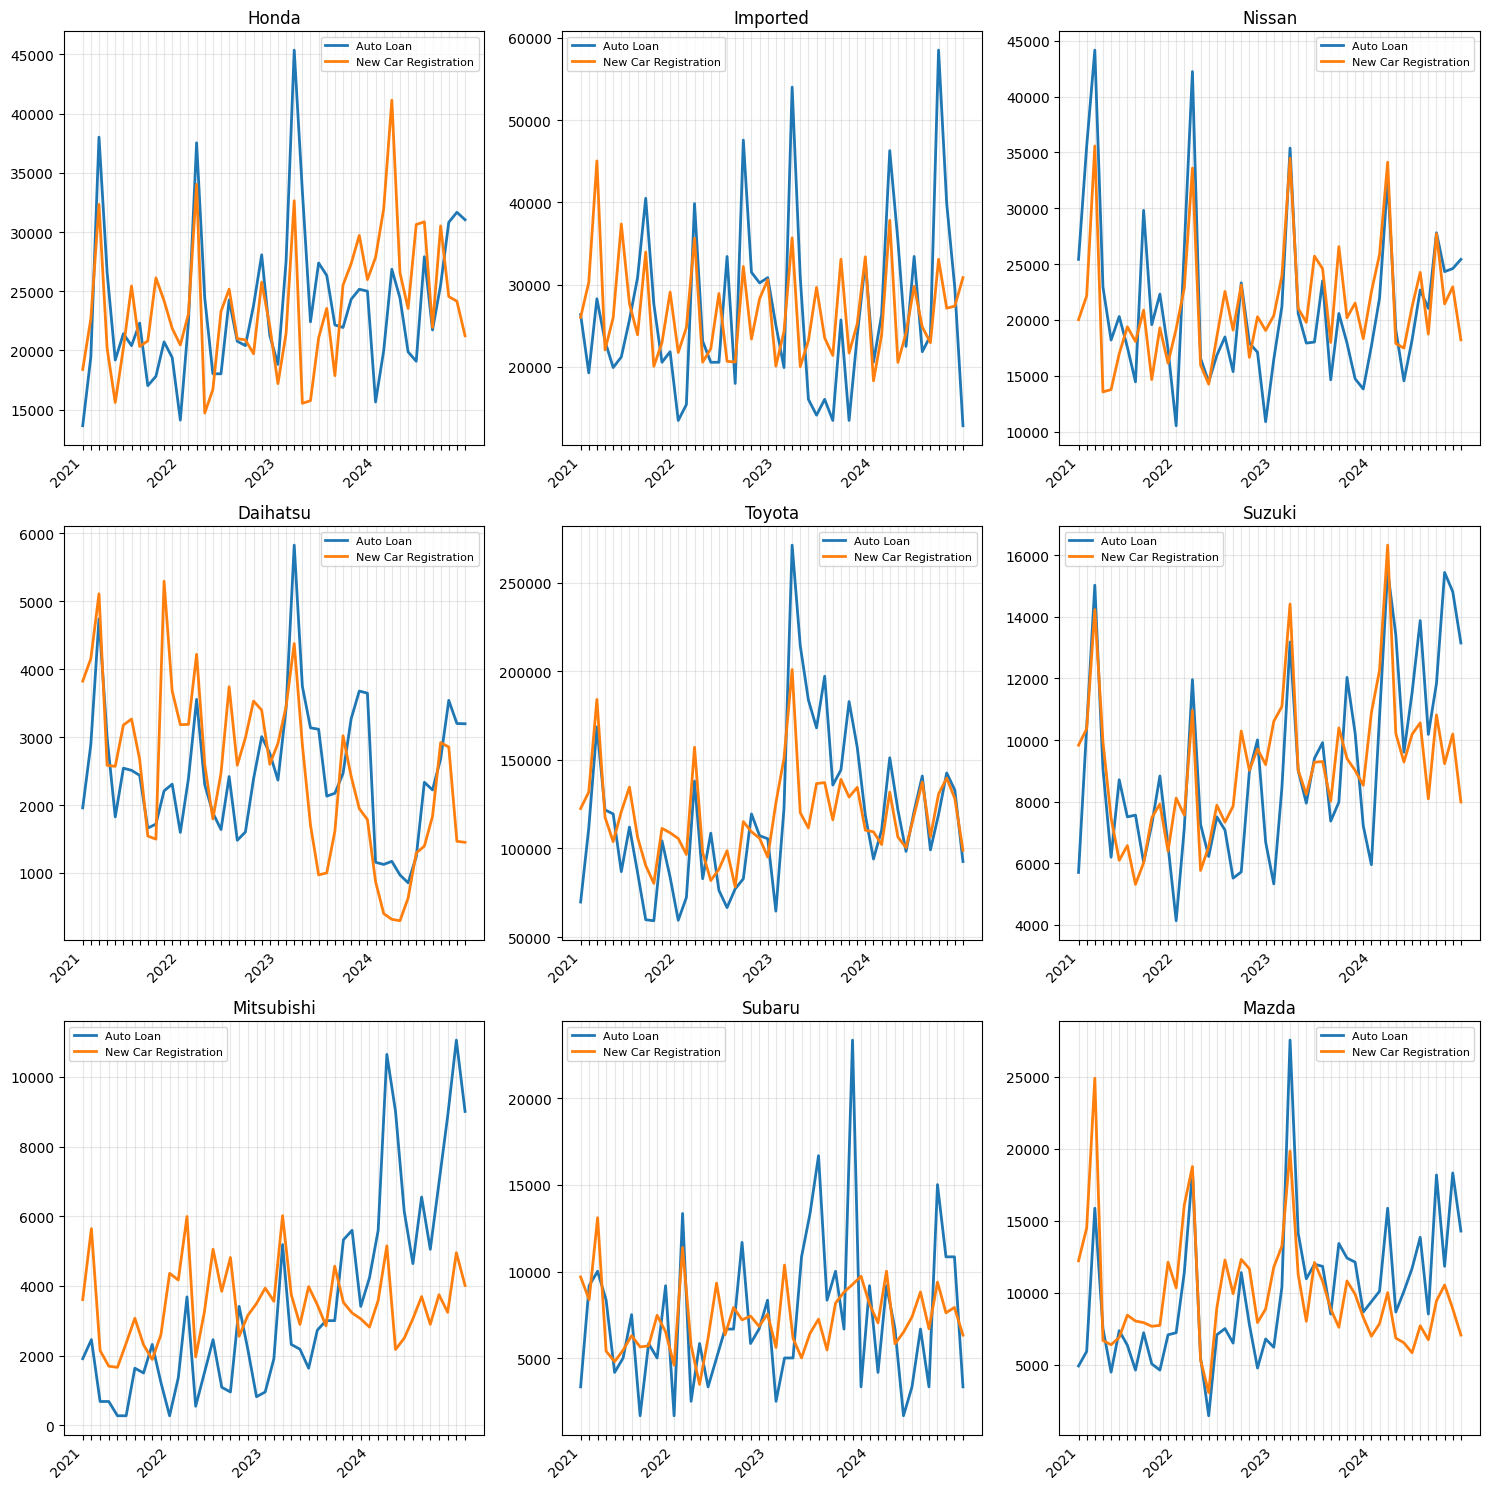

In [543]:
# 時系列の可視化を、全メーカーで一枚のグラフにn分割して表示
n_makers = len(common_makers)
n_cols = 3  # 1行あたりの列数
n_rows = (n_makers + n_cols - 1) // n_cols  # 必要な行数を計算

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

maker_english_name = {
    'いすゞ': 'Isuzu',
    'スズキ': 'Suzuki',
    'ダイハツ': 'Daihatsu',
    'トヨタ': 'Toyota',
    'ホンダ': 'Honda',
    'マツダ': 'Mazda',
    '三菱': 'Mitsubishi',
    '三菱ふそう': 'Mitsubishi Fuso',
    '日産': 'Nissan',
    '輸入車': 'Imported',
    'ＳＵＢＡＲＵ': 'Subaru'
}

# 各メーカーのプロット
for i, maker in enumerate(common_makers):
    row = i // n_cols
    col = i % n_cols
    
    # adjust factorを、各メーカーの件数と登録台数の平均値の比率にする
    adjust_factor = merged_df[merged_df['メーカー'] == maker]['登録台数'].mean() / merged_df[merged_df['メーカー'] == maker]['件数'].mean()
    print(f"メーカー: {maker}, adjust_factor: {adjust_factor:.2f}")
    
    merged_df_maker = merged_df[merged_df['メーカー'] == maker]
    
    # 英語名を取得
    english_name = maker_english_name.get(maker, maker)
    
    axes[row, col].plot(merged_df_maker['年月'], merged_df_maker['件数']*adjust_factor, 
                        label='Auto Loan', linewidth=2)
    axes[row, col].plot(merged_df_maker['年月'], merged_df_maker['登録台数'], 
                        label='New Car Registration', linewidth=2)
    axes[row, col].set_title(f'{english_name}', fontsize=12)
    axes[row, col].legend(fontsize=8)
    axes[row, col].grid(True, alpha=0.3)
    
    # x軸のラベルを年ごとに設定
    # 年月データを日付型に変換して年を抽出
    merged_df_maker['年月_date'] = pd.to_datetime(merged_df_maker['年月'])
    
    # 年ごとのラベルを設定（年が変わる位置にのみラベルを表示）
    all_labels = []
    for i, date in enumerate(merged_df_maker['年月']):
        year = pd.to_datetime(date).year
        if i == 0 or pd.to_datetime(merged_df_maker['年月'].iloc[i-1]).year != year:
            all_labels.append(str(year))
        else:
            all_labels.append('')
    
    # x軸のラベルを設定
    axes[row, col].set_xticks(range(len(merged_df_maker)))
    axes[row, col].set_xticklabels(all_labels, rotation=45, ha='right')

# 空のサブプロットを非表示にする
for i in range(n_makers, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()



=== 半月ラグ（1週間前進）での時系列可視化（移動平均適用） ===
ダイハツ(Daihatsu): 移動平均適用後の相関係数 = 0.5603 (有効データ数: 48)
スズキ(Suzuki): 移動平均適用後の相関係数 = 0.6642 (有効データ数: 48)
マツダ(Mazda): 移動平均適用後の相関係数 = 0.3695 (有効データ数: 48)
トヨタ(Toyota): 移動平均適用後の相関係数 = 0.7783 (有効データ数: 48)
日産(Nissan): 移動平均適用後の相関係数 = 0.5866 (有効データ数: 48)
三菱(Mitsubishi): 移動平均適用後の相関係数 = 0.2181 (有効データ数: 45)
輸入車(Imported): 移動平均適用後の相関係数 = 0.2254 (有効データ数: 48)
ホンダ(Honda): 移動平均適用後の相関係数 = 0.2501 (有効データ数: 48)
ＳＵＢＡＲＵ(Subaru): 移動平均適用後の相関係数 = 0.3064 (有効データ数: 46)


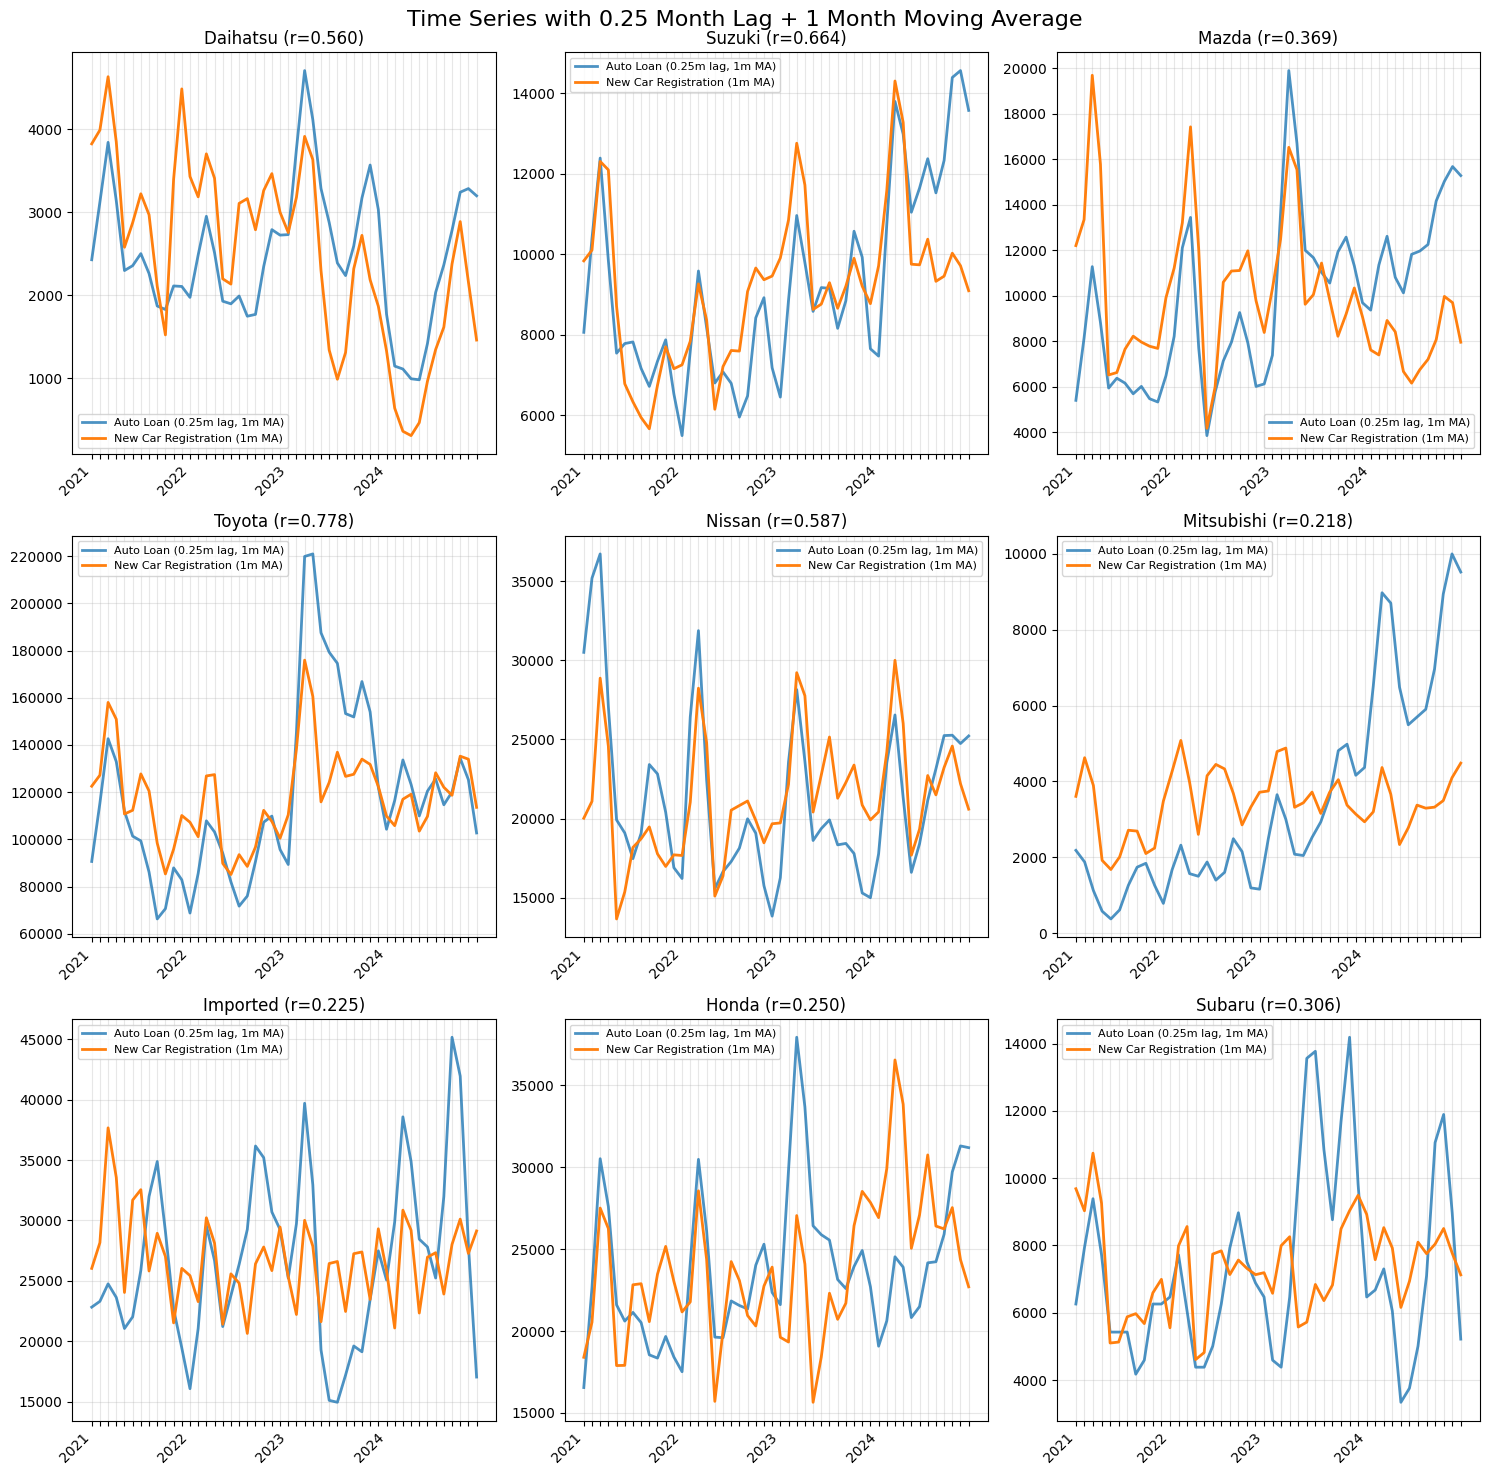


=== 半月ラグ + 移動平均適用後の相関係数一覧 ===
  メーカー        英語名  移動平均適用後相関  有効データ数
   トヨタ     Toyota   0.778285      48
   スズキ     Suzuki   0.664212      48
    日産     Nissan   0.586605      48
  ダイハツ   Daihatsu   0.560269      48
   マツダ      Mazda   0.369461      48
ＳＵＢＡＲＵ     Subaru   0.306368      46
   ホンダ      Honda   0.250107      48
   輸入車   Imported   0.225415      48
    三菱 Mitsubishi   0.218082      45

【統計情報】
• 有効な相関係数計算: 9/9 メーカー
• 最高相関: 0.7783 (トヨタ)
• 最低相関: 0.2181 (三菱)
• 平均相関: 0.4399
• 中央値相関: 0.3695

【高相関メーカー（r ≥ 0.7）】
• トヨタ(Toyota): 0.7783


In [544]:
# 半月ラグ（1週間前進）での時系列可視化（移動平均適用）
print("\n=== 半月ラグ（1週間前進）での時系列可視化（移動平均適用） ===")

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

# 相関係数を保存するリスト
ma_correlations = []

# 各メーカーのプロット（半月ラグ版・移動平均適用）
for i, maker in enumerate(['ダイハツ', 'スズキ', 'マツダ', 'トヨタ', '日産', '三菱', '輸入車', 'ホンダ', 'ＳＵＢＡＲＵ']):
    row = i // n_cols
    col = i % n_cols
    
    # adjust factorを、各メーカーの件数と登録台数の平均値の比率にする
    adjust_factor = merged_df[merged_df['メーカー'] == maker]['登録台数'].mean() / merged_df[merged_df['メーカー'] == maker]['件数'].mean()
    
    merged_df_maker = merged_df[merged_df['メーカー'] == maker].copy().reset_index(drop=True)
    
    # 半月前進させるため、年月を1週間早くシフト
    merged_df_maker['年月_date'] = pd.to_datetime(merged_df_maker['年月'])
    merged_df_maker['年月_shifted'] = merged_df_maker['年月_date'] - pd.Timedelta(days=7)
    merged_df_maker['年月_shifted_str'] = merged_df_maker['年月_shifted'].dt.to_period('M').astype(str)
    
    # 英語名を取得
    english_name = maker_english_name.get(maker, maker)
    
    # 半月ラグを適用（データを0.5ヶ月前進させる）
    # 現在の値と次の月の値の中間値を計算
    current_values = merged_df_maker['件数']
    next_values = merged_df_maker['件数'].shift(-1)
    auto_loan_lagged = (current_values + next_values) / 2
    # 最後の値は現在の値をそのまま使用
    auto_loan_lagged.iloc[-1] = current_values.iloc[-1]
    
    # 両社のデータに1ヶ月移動平均を適用
    auto_loan_ma = auto_loan_lagged.rolling(window=2, min_periods=1).mean()
    registration_ma = merged_df_maker['登録台数'].rolling(window=2, min_periods=1).mean()
    
    # 移動平均適用後の相関係数を計算
    valid_mask = ~(auto_loan_ma.isna() | registration_ma.isna())
    if valid_mask.sum() > 3:  # 最低3期間のデータが必要
        correlation = auto_loan_ma[valid_mask].corr(registration_ma[valid_mask])
        ma_correlations.append({
            'メーカー': maker,
            '英語名': english_name,
            '移動平均適用後相関': correlation,
            '有効データ数': valid_mask.sum()
        })
        print(f"{maker}({english_name}): 移動平均適用後の相関係数 = {correlation:.4f} (有効データ数: {valid_mask.sum()})")
    else:
        correlation = np.nan
        ma_correlations.append({
            'メーカー': maker,
            '英語名': english_name,
            '移動平均適用後相関': correlation,
            '有効データ数': valid_mask.sum()
        })
        print(f"{maker}({english_name}): データ不足のため相関係数計算不可 (有効データ数: {valid_mask.sum()})")
    
    # 1ヶ月移動平均での時系列プロット
    axes[row, col].plot(merged_df_maker['年月'], auto_loan_ma*adjust_factor, 
                        label='Auto Loan (0.25m lag, 1m MA)', linewidth=2, alpha=0.8)
    axes[row, col].plot(merged_df_maker['年月'], registration_ma, 
                        label='New Car Registration (1m MA)', linewidth=2)
    
    # タイトルに相関係数を表示
    if not np.isnan(correlation):
        axes[row, col].set_title(f'{english_name} (r={correlation:.3f})', fontsize=12)
    else:
        axes[row, col].set_title(f'{english_name} (r=N/A)', fontsize=12)
    
    axes[row, col].legend(fontsize=8)
    axes[row, col].grid(True, alpha=0.3)
    
    # 年ごとのラベルを設定（年が変わる位置にのみラベルを表示）
    all_labels = []
    for j, date in enumerate(merged_df_maker['年月']):
        year = pd.to_datetime(date).year
        if j == 0 or pd.to_datetime(merged_df_maker['年月'].iloc[j-1]).year != year:
            all_labels.append(str(year))
        else:
            all_labels.append('')
    
    # x軸のラベルを設定
    axes[row, col].set_xticks(range(len(merged_df_maker)))
    axes[row, col].set_xticklabels(all_labels, rotation=45, ha='right')

# 空のサブプロットを非表示にする
for i in range(n_makers, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.suptitle('Time Series with 0.25 Month Lag + 1 Month Moving Average', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# 相関係数の結果をまとめて表示
print("\n=== 半月ラグ + 移動平均適用後の相関係数一覧 ===")
ma_correlations_df = pd.DataFrame(ma_correlations)
ma_correlations_df = ma_correlations_df.sort_values('移動平均適用後相関', ascending=False, na_position='last')
print(ma_correlations_df.to_string(index=False))

# 統計情報を表示
valid_correlations = [x for x in ma_correlations_df['移動平均適用後相関'] if not np.isnan(x)]
if valid_correlations:
    print(f"\n【統計情報】")
    print(f"• 有効な相関係数計算: {len(valid_correlations)}/{len(ma_correlations_df)} メーカー")
    print(f"• 最高相関: {max(valid_correlations):.4f} ({ma_correlations_df.loc[ma_correlations_df['移動平均適用後相関'].idxmax(), 'メーカー']})")
    print(f"• 最低相関: {min(valid_correlations):.4f} ({ma_correlations_df.loc[ma_correlations_df['移動平均適用後相関'].idxmin(), 'メーカー']})")
    print(f"• 平均相関: {np.mean(valid_correlations):.4f}")
    print(f"• 中央値相関: {np.median(valid_correlations):.4f}")
    
    # 高相関メーカー（0.7以上）の表示
    high_corr_makers = ma_correlations_df[ma_correlations_df['移動平均適用後相関'] >= 0.7]
    if not high_corr_makers.empty:
        print(f"\n【高相関メーカー（r ≥ 0.7）】")
        for _, row in high_corr_makers.iterrows():
            print(f"• {row['メーカー']}({row['英語名']}): {row['移動平均適用後相関']:.4f}")
else:
    print(f"\n【警告】有効な相関係数が計算できませんでした。")


In [545]:
results = []

# 共通期間の特定（2024年のデータが両方にある期間）
common_period = pd.date_range('2024-01-01', '2024-12-31', freq='MS')

for maker in common_makers:
    print(f"\n--- {maker} の分析 ---")
    
    # merged_dfから該当メーカーのデータを取得
    maker_data = merged_df[merged_df['メーカー'] == maker].copy()
    
    if len(maker_data) > 5:
        # 年月をインデックスに設定
        maker_data = maker_data.set_index('年月').sort_index()
        
        # 各ラグでの相関を計算
        all_correlations = {}
        
        # 0ヶ月から6ヶ月まで（半月単位で13回）
        for lag in range(0, 13):
            # オートローン件数をlag/2期間前にシフト（半月単位）
            shifted_auto = maker_data['件数'].shift(lag)
            
            # 有効なデータ期間で相関計算
            valid_mask = ~(shifted_auto.isna() | maker_data['登録台数'].isna())
            if valid_mask.sum() > 5:  # 最低5期間のデータが必要
                corr = shifted_auto[valid_mask].corr(maker_data['登録台数'][valid_mask])
                all_correlations[lag/2] = corr  # 半月単位でラグを記録
            else:
                all_correlations[lag/2] = np.nan
        
        # 最大相関とそのラグを見つける
        if all_correlations:
            best_lag = max(all_correlations, key=all_correlations.get)
            best_corr = all_correlations[best_lag]
            sync_corr = all_correlations.get(0, np.nan)
            
            results.append({
                'メーカー': maker,
                '最適ラグ（月）': best_lag,
                '最大相関': best_corr,
                '同期相関': sync_corr,
                'データ期間': f"{maker_data.index.min()} - {maker_data.index.max()}"
            })
            
            print(f"最適ラグ: {best_lag}ヶ月")
            print(f"最大相関: {best_corr:.3f}")
            print(f"同期相関: {sync_corr:.3f}")
            
            # 各ラグでの相関を表示
            print("各ラグでの相関上位3つ:")
            # for lag in sorted(all_correlations.keys(), key=lambda x: all_correlations[x], reverse=True)[:3]:
            for lag in all_correlations.keys():
                print(f"  ラグ{lag}ヶ月: {all_correlations[lag]:.3f}")
        else:
            print(f"有効な相関が見つかりませんでした")
    else:
        print(f"データが不足しています（データ数: {len(maker_data)}）")



--- ホンダ の分析 ---
最適ラグ: 6.0ヶ月
最大相関: 0.718
同期相関: 0.386
各ラグでの相関上位3つ:
  ラグ0.0ヶ月: 0.386
  ラグ0.5ヶ月: -0.397
  ラグ1.0ヶ月: -0.526
  ラグ1.5ヶ月: 0.062
  ラグ2.0ヶ月: 0.245
  ラグ2.5ヶ月: -0.153
  ラグ3.0ヶ月: -0.075
  ラグ3.5ヶ月: 0.282
  ラグ4.0ヶ月: 0.313
  ラグ4.5ヶ月: 0.061
  ラグ5.0ヶ月: 0.008
  ラグ5.5ヶ月: 0.476
  ラグ6.0ヶ月: 0.718

--- 輸入車 の分析 ---
最適ラグ: 3.0ヶ月
最大相関: 0.512
同期相関: 0.456
各ラグでの相関上位3つ:
  ラグ0.0ヶ月: 0.456
  ラグ0.5ヶ月: -0.355
  ラグ1.0ヶ月: -0.036
  ラグ1.5ヶ月: 0.336
  ラグ2.0ヶ月: -0.324
  ラグ2.5ヶ月: -0.076
  ラグ3.0ヶ月: 0.512
  ラグ3.5ヶ月: -0.289
  ラグ4.0ヶ月: 0.072
  ラグ4.5ヶ月: 0.220
  ラグ5.0ヶ月: -0.437
  ラグ5.5ヶ月: -0.047
  ラグ6.0ヶ月: 0.497

--- 日産 の分析 ---
最適ラグ: 0.0ヶ月
最大相関: 0.730
同期相関: 0.730
各ラグでの相関上位3つ:
  ラグ0.0ヶ月: 0.730
  ラグ0.5ヶ月: -0.082
  ラグ1.0ヶ月: -0.387
  ラグ1.5ヶ月: -0.344
  ラグ2.0ヶ月: -0.014
  ラグ2.5ヶ月: -0.115
  ラグ3.0ヶ月: 0.142
  ラグ3.5ヶ月: -0.343
  ラグ4.0ヶ月: -0.190
  ラグ4.5ヶ月: -0.292
  ラグ5.0ヶ月: -0.205
  ラグ5.5ヶ月: 0.026
  ラグ6.0ヶ月: 0.703

--- ダイハツ の分析 ---
最適ラグ: 0.0ヶ月
最大相関: 0.508
同期相関: 0.508
各ラグでの相関上位3つ:
  ラグ0.0ヶ月: 0.508
  ラグ0.5ヶ月: 0.099
  ラグ1.0ヶ月: -0.172
 


=== ラグによる相関係数の推移の可視化 ===

--- ダイハツ のラグ相関分析 ---
最大相関: 0.508
最適ラグ: 0.0ヶ月

--- スズキ のラグ相関分析 ---
最大相関: 0.589
最適ラグ: 0.0ヶ月

--- マツダ のラグ相関分析 ---
最大相関: 0.513
最適ラグ: 0.0ヶ月

--- トヨタ のラグ相関分析 ---
最大相関: 0.704
最適ラグ: 0.0ヶ月

--- 日産 のラグ相関分析 ---
最大相関: 0.730
最適ラグ: 0.0ヶ月

--- 三菱 のラグ相関分析 ---
最大相関: 0.254
最適ラグ: 0.0ヶ月

--- 輸入車 のラグ相関分析 ---
最大相関: 0.512
最適ラグ: 3.0ヶ月

--- ホンダ のラグ相関分析 ---
最大相関: 0.718
最適ラグ: 6.0ヶ月

--- ＳＵＢＡＲＵ のラグ相関分析 ---
最大相関: 0.350
最適ラグ: 2.0ヶ月


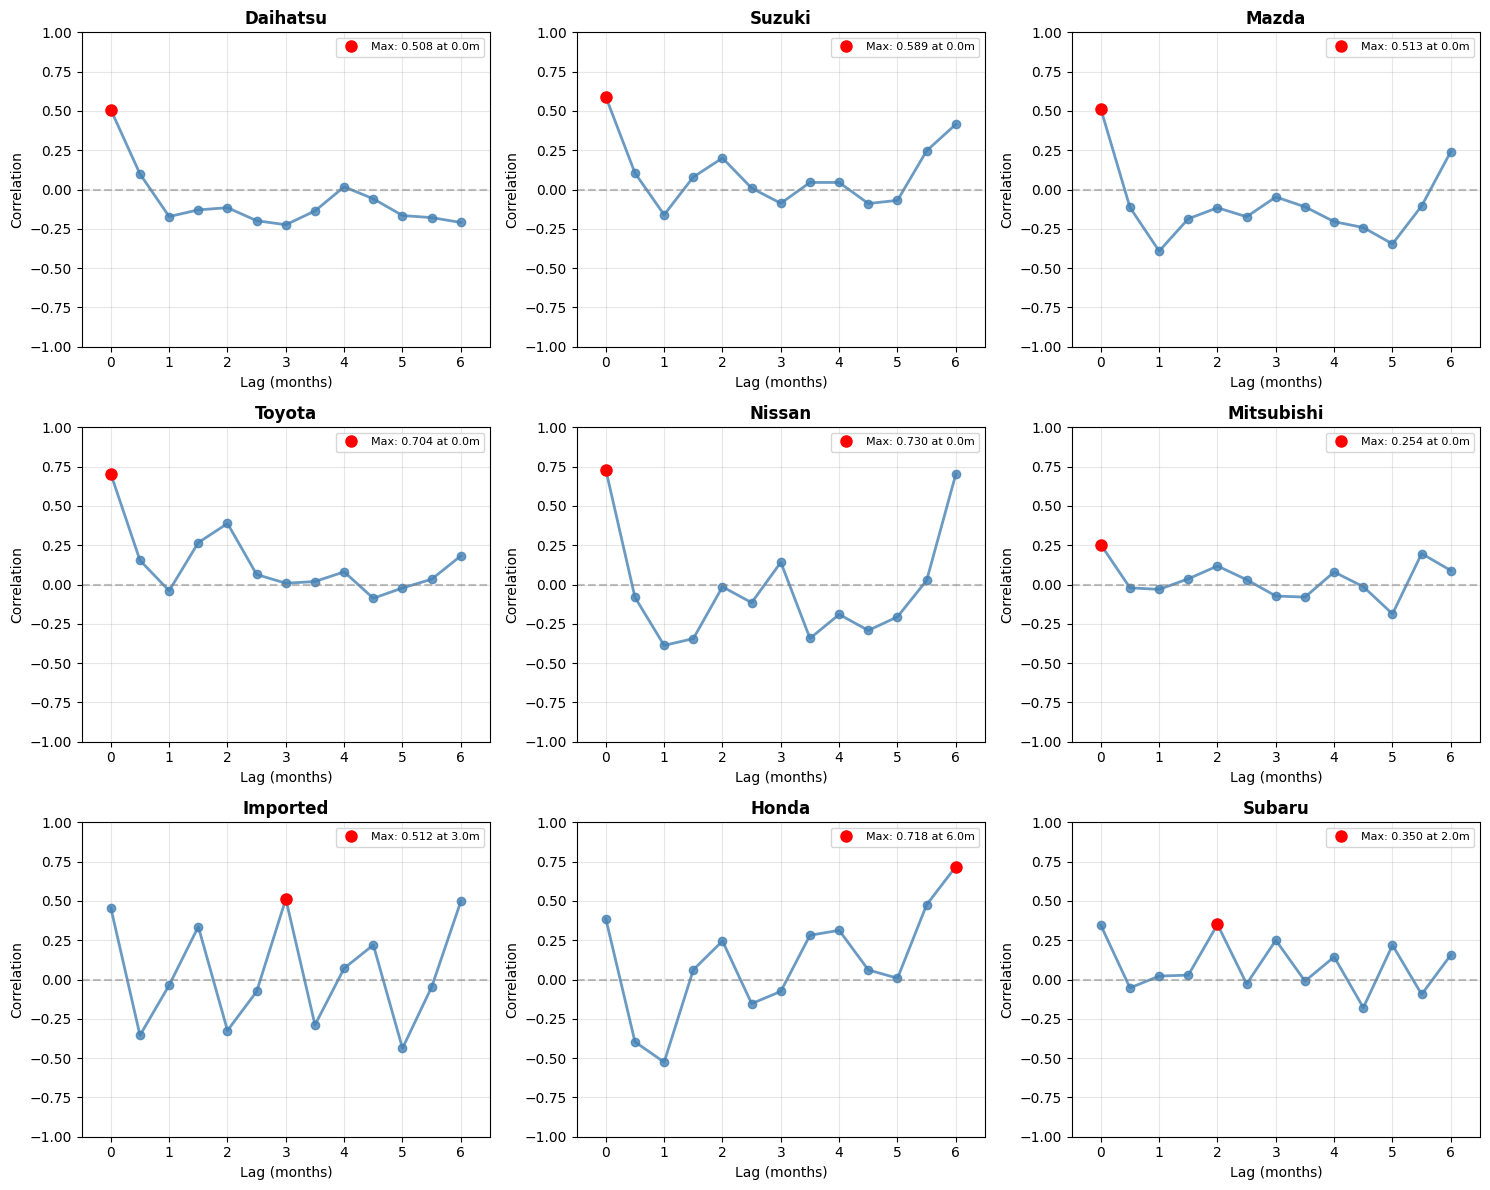


【ラグ相関分析の結果】
• 各メーカーについて、オートローンデータを0〜6ヶ月前にシフトした場合の相関を計算
• 最大相関を示すラグが、そのメーカーの先行性を示す指標となる
• 正のラグ：オートローンが新車登録より先行
• 負のラグ：新車登録がオートローンより先行


In [546]:
# ラグによる相関係数の推移の可視化
print("\n=== ラグによる相関係数の推移の可視化 ===")

# 9分割のサブプロットを作成
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

common_makers = ['ダイハツ', 'スズキ', 'マツダ', 'トヨタ', '日産', '三菱', '輸入車', 'ホンダ', 'ＳＵＢＡＲＵ']

# 各メーカーのラグ相関を計算してプロット
for i, maker in enumerate(list(common_makers)[:9]):  # 最初の9メーカーのみ
    print(f"\n--- {maker} のラグ相関分析 ---")
    
    # merged_dfから該当メーカーのデータを取得
    maker_data = merged_df[merged_df['メーカー'] == maker].copy()
    
    if len(maker_data) > 5:
        # 年月をインデックスに設定
        maker_data = maker_data.set_index('年月').sort_index()
        
        # 各ラグでの相関を計算（0ヶ月から6ヶ月まで）
        lags = []
        correlations = []
        
        for lag in range(0, 13):  # 0から12まで（6ヶ月分）
            # オートローン件数をlag/2期間前にシフト（半月単位）
            shifted_auto = maker_data['件数'].shift(lag)
            
            # 有効なデータ期間で相関計算
            valid_mask = ~(shifted_auto.isna() | maker_data['登録台数'].isna())
            if valid_mask.sum() > 5:  # 最低5期間のデータが必要
                corr = shifted_auto[valid_mask].corr(maker_data['登録台数'][valid_mask])
                lags.append(lag/2)  # 半月単位でラグを記録
                correlations.append(corr)
            else:
                lags.append(lag/2)
                correlations.append(np.nan)
        
        # 英語名を取得
        english_name = maker_english_name.get(maker, maker)
        
        # プロット
        axes[i].plot(lags, correlations, 'o-', linewidth=2, markersize=6, 
                    color='steelblue', alpha=0.8)
        axes[i].set_title(f'{english_name}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Lag (months)', fontsize=10)
        axes[i].set_ylabel('Correlation', fontsize=10)
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlim(-0.5, 6.5)
        axes[i].set_ylim(-1, 1)
        
        # 最大相関点を強調
        if correlations and not all(np.isnan(correlations)):
            max_corr_idx = np.nanargmax(correlations)
            max_corr = correlations[max_corr_idx]
            max_lag = lags[max_corr_idx]
            axes[i].plot(max_lag, max_corr, 'ro', markersize=8, 
                        label=f'Max: {max_corr:.3f} at {max_lag:.1f}m')
            axes[i].legend(fontsize=8)
        
        # ゼロラインを追加
        axes[i].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        
        print(f"最大相関: {max(correlations, key=lambda x: x if not np.isnan(x) else -1):.3f}")
        print(f"最適ラグ: {lags[np.nanargmax(correlations)]:.1f}ヶ月")
    else:
        axes[i].text(0.5, 0.5, f'Insufficient data\nfor {maker}', 
                    ha='center', va='center', transform=axes[i].transAxes,
                    fontsize=10, color='gray')
        axes[i].set_title(f'{maker}', fontsize=12)
        axes[i].set_xlabel('Lag (months)', fontsize=10)
        axes[i].set_ylabel('Correlation', fontsize=10)

# 空のサブプロットを非表示にする
for i in range(len(list(common_makers)[:9]), 9):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

print(f"\n【ラグ相関分析の結果】")
print(f"• 各メーカーについて、オートローンデータを0〜6ヶ月前にシフトした場合の相関を計算")
print(f"• 最大相関を示すラグが、そのメーカーの先行性を示す指標となる")
print(f"• 正のラグ：オートローンが新車登録より先行")
print(f"• 負のラグ：新車登録がオートローンより先行")

In [547]:
# # オートローンデータ日付フォーマット変更
# def convert_contract_date(date_str):
#     try:
#         dt = pd.to_datetime(date_str, format='%d%b%Y:%H:%M:%S')
#         formatted = dt.strftime('%m/%d/%Y')
#         # 先頭ゼロを削除
#         parts = formatted.split('/')
#         month = str(int(parts[0]))
#         day = str(int(parts[1]))
#         year = parts[2]
#         return f"{month}/{day}/{year}"
#     except Exception as e:
#         print(f"日付変換エラー: {date_str} -> {e}")
#         return date_str

# # 契約年月日列を変換
# auto_loan_df['契約年月日'] = auto_loan_df['契約年月日'].apply(convert_contract_date)

In [548]:
# # オートローンデータ日付フォーマット変更
# def convert_contract_date(date_str):
#     try:
#         dt = pd.to_datetime(date_str, format='%d%b%Y:%H:%M:%S')
#         formatted = dt.strftime('%m/%d/%Y')
#         # 先頭ゼロを削除
#         parts = formatted.split('/')
#         month = str(int(parts[0]))
#         day = str(int(parts[1]))
#         year = parts[2]
#         return f"{month}/{day}/{year}"
#     except Exception as e:
#         print(f"日付変換エラー: {date_str} -> {e}")
#         return date_str

# # 契約年月日列を変換
# auto_loan_df['契約年月日'] = auto_loan_df['契約年月日'].apply(convert_contract_date)

In [549]:
# # オートローンデータ日付フォーマット変更
# def convert_contract_date(date_str):
#     try:
#         dt = pd.to_datetime(date_str, format='%d%b%Y:%H:%M:%S')
#         formatted = dt.strftime('%m/%d/%Y')
#         # 先頭ゼロを削除
#         parts = formatted.split('/')
#         month = str(int(parts[0]))
#         day = str(int(parts[1]))
#         year = parts[2]
#         return f"{month}/{day}/{year}"
#     except Exception as e:
#         print(f"日付変換エラー: {date_str} -> {e}")
#         return date_str

# # 契約年月日列を変換
# auto_loan_df['契約年月日'] = auto_loan_df['契約年月日'].apply(convert_contract_date)

In [550]:
# # オートローンデータ日付フォーマット変更
# def convert_contract_date(date_str):
#     try:
#         dt = pd.to_datetime(date_str, format='%d%b%Y:%H:%M:%S')
#         formatted = dt.strftime('%m/%d/%Y')
#         # 先頭ゼロを削除
#         parts = formatted.split('/')
#         month = str(int(parts[0]))
#         day = str(int(parts[1]))
#         year = parts[2]
#         return f"{month}/{day}/{year}"
#     except Exception as e:
#         print(f"日付変換エラー: {date_str} -> {e}")
#         return date_str

# # 契約年月日列を変換
# auto_loan_df['契約年月日'] = auto_loan_df['契約年月日'].apply(convert_contract_date)

In [551]:
# # オートローンデータ日付フォーマット変更
# def convert_contract_date(date_str):
#     try:
#         dt = pd.to_datetime(date_str, format='%d%b%Y:%H:%M:%S')
#         formatted = dt.strftime('%m/%d/%Y')
#         # 先頭ゼロを削除
#         parts = formatted.split('/')
#         month = str(int(parts[0]))
#         day = str(int(parts[1]))
#         year = parts[2]
#         return f"{month}/{day}/{year}"
#     except Exception as e:
#         print(f"日付変換エラー: {date_str} -> {e}")
#         return date_str

# # 契約年月日列を変換
# auto_loan_df['契約年月日'] = auto_loan_df['契約年月日'].apply(convert_contract_date)


=== オリコ契約件数カバー率分析（2024年） ===

1. 全体カバー率
オリコ契約件数: 38,636
新車登録台数: 2,500,870.0
カバー率: 1.54%

2. メーカー別カバー率
  メーカー    件数      登録台数  カバー率（%）
  ダイハツ  6408   14856.0    43.13
   スズキ 17313  115153.0    15.03
   ホンダ  5276  307128.0     1.72
    三菱   612   39014.0     1.57
   マツダ   980   87298.0     1.12
    日産  2758  249845.0     1.10
   トヨタ  4654 1301591.0     0.36
   輸入車   545  302470.0     0.18
ＳＵＢＡＲＵ    90   83515.0     0.11


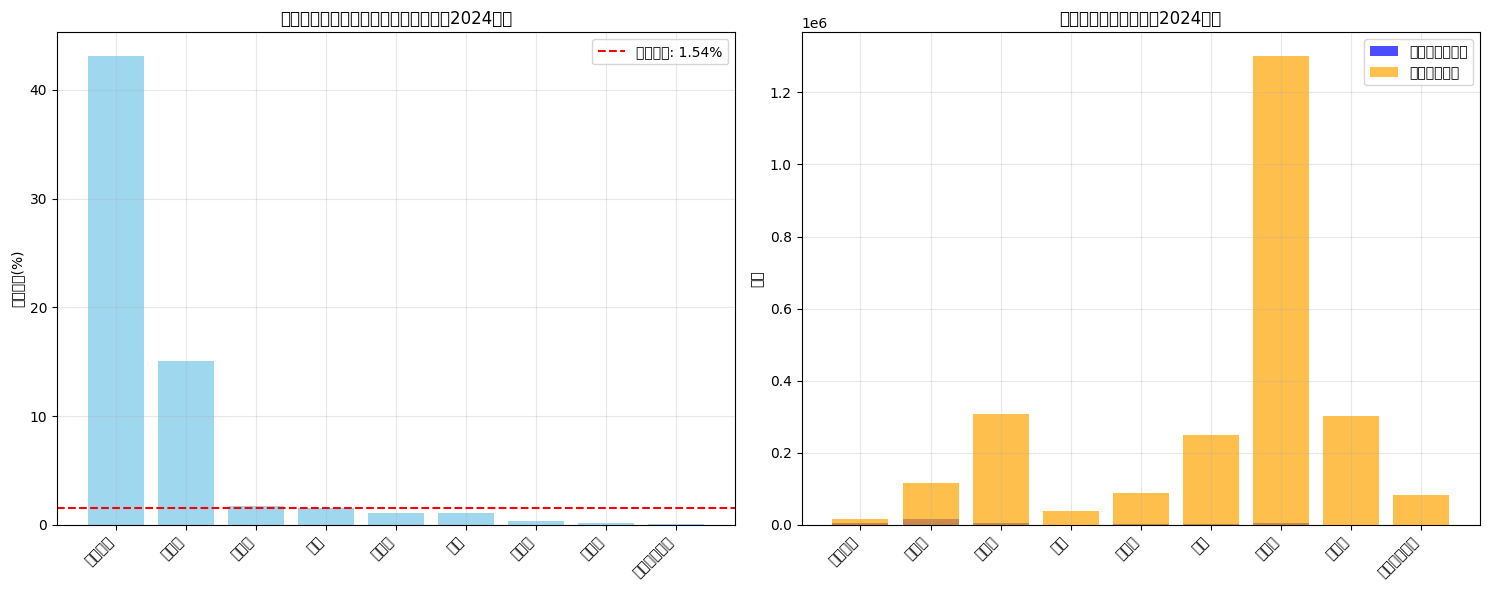


【分析結果】
• 全体のカバー率は1.54%です
• 最もカバー率が高いメーカー: ダイハツ (43.13%)
• 最もカバー率が低いメーカー: ＳＵＢＡＲＵ (0.11%)


In [552]:
# オリコの契約件数カバー率分析（2024年）
print("\n=== オリコ契約件数カバー率分析（2024年） ===")

# 2024年のデータを抽出
auto_loan_2024 = auto_loan_monthly[auto_loan_monthly['年月'] >= '2024-01-01']
auto_loan_2024 = auto_loan_2024[auto_loan_2024['年月'] <= '2024-12-01']

registration_2024 = registration_melted[registration_melted['年月'] >= '2024-01-01']
registration_2024 = registration_2024[registration_2024['年月'] <= '2024-12-01']

# メーカー別に2024年全体の合計を計算
auto_loan_total_2024 = auto_loan_2024.groupby('メーカー')['件数'].sum().reset_index()
registration_total_2024 = registration_2024.groupby('メーカー')['登録台数'].sum().reset_index()

# マージしてカバー率を計算
coverage_df = pd.merge(auto_loan_total_2024, registration_total_2024, on='メーカー', how='inner')
coverage_df['カバー率（%）'] = (coverage_df['件数'] / coverage_df['登録台数'] * 100).round(2)

# 全体のカバー率も計算
total_auto_loan = coverage_df['件数'].sum()
total_registration = coverage_df['登録台数'].sum()
overall_coverage = (total_auto_loan / total_registration * 100).round(2)

print(f"\n1. 全体カバー率")
print(f"オリコ契約件数: {total_auto_loan:,}")
print(f"新車登録台数: {total_registration:,}")
print(f"カバー率: {overall_coverage}%")

print(f"\n2. メーカー別カバー率")
coverage_sorted = coverage_df.sort_values('カバー率（%）', ascending=False)
print(coverage_sorted.to_string(index=False))

# 可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# カバー率の棒グラフ
ax1.bar(range(len(coverage_sorted)), coverage_sorted['カバー率（%）'], 
         color='skyblue', alpha=0.8)
ax1.set_xticks(range(len(coverage_sorted)))
ax1.set_xticklabels(coverage_sorted['メーカー'], rotation=45, ha='right')
ax1.set_ylabel('カバー率(%)')
ax1.set_title('メーカー別オリコ契約件数カバー率（2024年）')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=overall_coverage, color='red', linestyle='--', 
             label=f'全体平均: {overall_coverage}%')
ax1.legend()

# 件数と登録台数の比較
ax2.bar(range(len(coverage_sorted)), coverage_sorted['件数'], 
         alpha=0.7, label='オリコ契約件数', color='blue')
ax2.bar(range(len(coverage_sorted)), coverage_sorted['登録台数'], 
         alpha=0.7, label='新車登録台数', color='orange')
ax2.set_xticks(range(len(coverage_sorted)))
ax2.set_xticklabels(coverage_sorted['メーカー'], rotation=45, ha='right')
ax2.set_ylabel('台数')
ax2.set_title('メーカー別件数比較（2024年）')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n【分析結果】")
print(f"• 全体のカバー率は{overall_coverage}%です")
print(f"• 最もカバー率が高いメーカー: {coverage_sorted.iloc[0]['メーカー']} ({coverage_sorted.iloc[0]['カバー率（%）']}%)")
print(f"• 最もカバー率が低いメーカー: {coverage_sorted.iloc[-1]['メーカー']} ({coverage_sorted.iloc[-1]['カバー率（%）']}%)")



=== カバー率と相関の関係分析 ===

【カバー率と相関の関係】
  メーカー  カバー率（%）     最大相関  最適ラグ（月）
   スズキ    15.03 0.589468      0.0
  ダイハツ    43.13 0.507816      0.0
   トヨタ     0.36 0.704066      0.0
   ホンダ     1.72 0.718478      6.0
   マツダ     1.12 0.512850      0.0
    三菱     1.57 0.253855      0.0
    日産     1.10 0.729980      0.0
   輸入車     0.18 0.511788      3.0
ＳＵＢＡＲＵ     0.11 0.350499      2.0


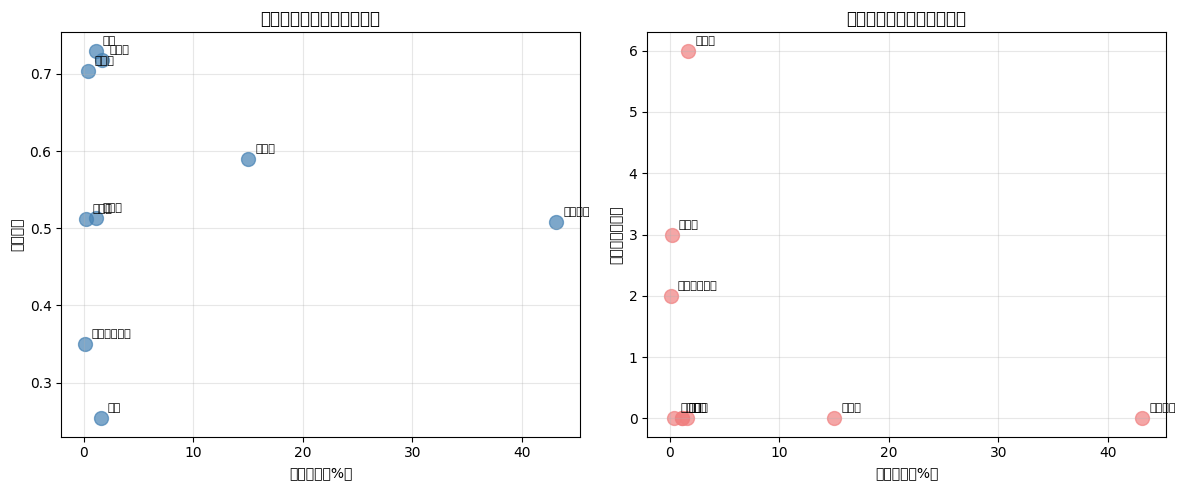


【相関分析結果】
• カバー率と最大相関の相関係数: -0.038
• カバー率と最適ラグの相関係数: -0.280

【ダイハツの詳細分析】
• カバー率: 43.13%
• 最大相関: 0.508
• 最適ラグ: 0.0ヶ月
• ダイハツは高カバー率と高相関の両方を示しており、
  オリコデータが市場動向を最も正確に反映している可能性が高い

=== 中古車を含めたオリコ契約件数カバー率分析（2024年） ===

【全体カバー率（中古車含む）】
オリコ契約件数合計（中古車含む）: 131,068件
新車登録台数合計: 2,597,435.0台
カバー率: 5.05%

【メーカー別カバー率（中古車含む）】
  メーカー    件数      登録台数  カバー率（%）
  ダイハツ 19740   14856.0   132.88
   スズキ 34959  115153.0    30.36
    日産 15492  249845.0     6.20
   ホンダ 18723  307128.0     6.10
    三菱  1828   39014.0     4.69
   マツダ  3518   87298.0     4.03
   トヨタ 31699 1301591.0     2.44
ＳＵＢＡＲＵ  1752   83515.0     2.10
   輸入車  3324  302470.0     1.10
   いすゞ    26   63727.0     0.04
 三菱ふそう     7   32838.0     0.02

【新車のみ vs 中古車含む カバー率比較】
  メーカー  新車のみカバー率（%）  中古車含むカバー率（%）  カバー率差（%）
   スズキ        15.03         30.36     15.33
  ダイハツ        43.13        132.88     89.75
   トヨタ         0.36          2.44      2.08
   ホンダ         1.72          6.10      4.38
   マツダ         1.12          4.03      2.91
    三菱         1.

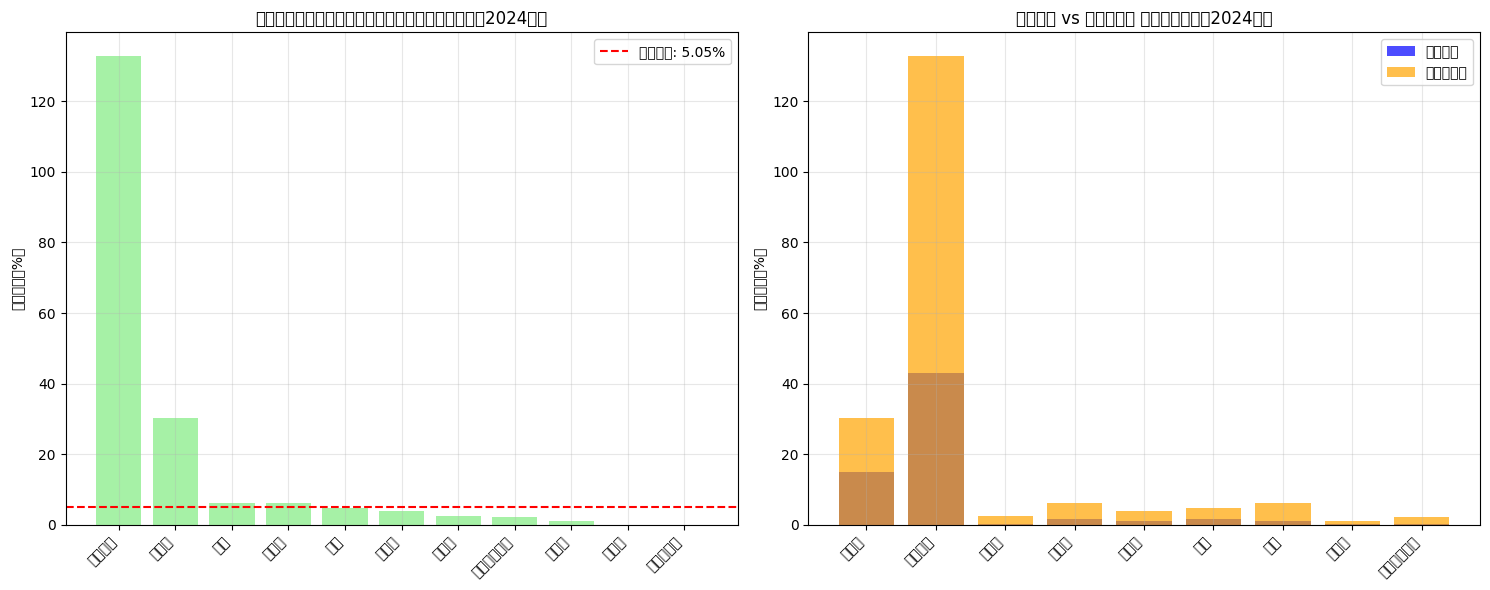


【分析結果（中古車含む）】
• 全体のカバー率（中古車含む）は5.05%です
• 新車のみのカバー率: 1.54%
• カバー率の向上: 3.51ポイント
• 最もカバー率が高いメーカー: ダイハツ (132.88%)
• 最もカバー率が低いメーカー: 三菱ふそう (0.02%)


In [553]:
#%%
# カバー率と相関の関係分析
print("\n=== カバー率と相関の関係分析 ===")

# 先行性分析の結果がある場合
if 'results' in locals() and results:
    results_df = pd.DataFrame(results)
    
    # カバー率データと相関データをマージ
    correlation_coverage_df = pd.merge(
        coverage_df[['メーカー', 'カバー率（%）']], 
        results_df[['メーカー', '最大相関', '最適ラグ（月）']], 
        on='メーカー', how='inner'
    )
    
    print(f"\n【カバー率と相関の関係】")
    print(correlation_coverage_df.to_string(index=False))
    
    # カバー率と相関の散布図
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(correlation_coverage_df['カバー率（%）'], correlation_coverage_df['最大相関'], 
               s=100, alpha=0.7, c='steelblue')
    
    # 各点にメーカー名をラベル
    for i, row in correlation_coverage_df.iterrows():
        plt.annotate(row['メーカー'], 
                    (row['カバー率（%）'], row['最大相関']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    plt.xlabel('カバー率（%）')
    plt.ylabel('最大相関')
    plt.title('カバー率と最大相関の関係')
    plt.grid(True, alpha=0.3)
    
    # カバー率とラグの関係
    plt.subplot(1, 2, 2)
    plt.scatter(correlation_coverage_df['カバー率（%）'], correlation_coverage_df['最適ラグ（月）'], 
               s=100, alpha=0.7, c='lightcoral')
    
    for i, row in correlation_coverage_df.iterrows():
        plt.annotate(row['メーカー'], 
                    (row['カバー率（%）'], row['最適ラグ（月）']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    plt.xlabel('カバー率（%）')
    plt.ylabel('最適ラグ（月）')
    plt.title('カバー率と最適ラグの関係')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 相関分析
    coverage_corr = correlation_coverage_df['カバー率（%）'].corr(correlation_coverage_df['最大相関'])
    lag_corr = correlation_coverage_df['カバー率（%）'].corr(correlation_coverage_df['最適ラグ（月）'])
    
    print(f"\n【相関分析結果】")
    print(f"• カバー率と最大相関の相関係数: {coverage_corr:.3f}")
    print(f"• カバー率と最適ラグの相関係数: {lag_corr:.3f}")
    
    # ダイハツの詳細分析
    daihatsu_data = correlation_coverage_df[correlation_coverage_df['メーカー'] == 'ダイハツ']
    if not daihatsu_data.empty:
        print(f"\n【ダイハツの詳細分析】")
        print(f"• カバー率: {daihatsu_data.iloc[0]['カバー率（%）']}%")
        print(f"• 最大相関: {daihatsu_data.iloc[0]['最大相関']:.3f}")
        print(f"• 最適ラグ: {daihatsu_data.iloc[0]['最適ラグ（月）']:.1f}ヶ月")
        print(f"• ダイハツは高カバー率と高相関の両方を示しており、")
print(f"  オリコデータが市場動向を最も正確に反映している可能性が高い")


#%%
# 中古車を含めたオリコの契約件数カバー率分析（2024年）
print("\n=== 中古車を含めたオリコ契約件数カバー率分析（2024年） ===")

# 中古車を含むオートローンデータを準備
all_car_loans = auto_loan_df.copy()
all_car_loans['契約年月日'] = pd.to_datetime(all_car_loans['契約年月日'])

# 2週間ずらし
all_car_loans['契約年月日'] = all_car_loans['契約年月日'] - pd.Timedelta(days=14)

# メーカー名をマッピング
all_car_loans['メーカー'] = all_car_loans['メーカー'].map(maker_mapping)
all_car_loans = all_car_loans.dropna()

# 月次集計
all_car_loans_monthly = all_car_loans.groupby(['契約年月日', 'メーカー']).agg({
    '件数': 'sum',
}).reset_index()

all_car_loans_monthly['年月'] = all_car_loans_monthly['契約年月日'].dt.to_period('M')
all_car_loans_monthly = all_car_loans_monthly.groupby(['年月', 'メーカー']).agg({
    '件数': 'sum',
}).reset_index()

# 2024年のデータを抽出
all_car_loans_2024 = all_car_loans_monthly[all_car_loans_monthly['年月'] >= '2024-01-01']
all_car_loans_2024 = all_car_loans_2024[all_car_loans_2024['年月'] <= '2024-12-01']

# メーカー別に2024年全体の合計を計算
all_car_loans_total_2024 = all_car_loans_2024.groupby('メーカー')['件数'].sum().reset_index()

# マージしてカバー率を計算
all_coverage_df = pd.merge(all_car_loans_total_2024, registration_total_2024, on='メーカー', how='inner')
all_coverage_df['カバー率（%）'] = (all_coverage_df['件数'] / all_coverage_df['登録台数'] * 100).round(2)

# 全体のカバー率も計算
total_all_car_loans = all_coverage_df['件数'].sum()
total_registration_all = all_coverage_df['登録台数'].sum()
overall_all_coverage = (total_all_car_loans / total_registration_all * 100).round(2)

print(f"\n【全体カバー率（中古車含む）】")
print(f"オリコ契約件数合計（中古車含む）: {total_all_car_loans:,}件")
print(f"新車登録台数合計: {total_registration_all:,}台")
print(f"カバー率: {overall_all_coverage}%")

print(f"\n【メーカー別カバー率（中古車含む）】")
all_coverage_sorted = all_coverage_df.sort_values('カバー率（%）', ascending=False)
print(all_coverage_sorted.to_string(index=False))

# 新車のみと中古車含むの比較
comparison_df = pd.merge(
    coverage_df[['メーカー', 'カバー率（%）']].rename(columns={'カバー率（%）': '新車のみカバー率（%）'}),
    all_coverage_df[['メーカー', 'カバー率（%）']].rename(columns={'カバー率（%）': '中古車含むカバー率（%）'}),
    on='メーカー', how='inner'
)
comparison_df['カバー率差（%）'] = comparison_df['中古車含むカバー率（%）'] - comparison_df['新車のみカバー率（%）']

print(f"\n【新車のみ vs 中古車含む カバー率比較】")
print(comparison_df.to_string(index=False))

# 可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 中古車含むカバー率の棒グラフ
ax1.bar(range(len(all_coverage_sorted)), all_coverage_sorted['カバー率（%）'], 
         color='lightgreen', alpha=0.8)
ax1.set_xticks(range(len(all_coverage_sorted)))
ax1.set_xticklabels(all_coverage_sorted['メーカー'], rotation=45, ha='right')
ax1.set_ylabel('カバー率（%）')
ax1.set_title('メーカー別オリコ契約件数カバー率（中古車含む、2024年）')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=overall_all_coverage, color='red', linestyle='--', 
             label=f'全体平均: {overall_all_coverage}%')
ax1.legend()

# 新車のみ vs 中古車含むの比較
ax2.bar(range(len(comparison_df)), comparison_df['新車のみカバー率（%）'], 
         alpha=0.7, label='新車のみ', color='blue')
ax2.bar(range(len(comparison_df)), comparison_df['中古車含むカバー率（%）'], 
         alpha=0.7, label='中古車含む', color='orange')
ax2.set_xticks(range(len(comparison_df)))
ax2.set_xticklabels(comparison_df['メーカー'], rotation=45, ha='right')
ax2.set_ylabel('カバー率（%）')
ax2.set_title('新車のみ vs 中古車含む カバー率比較（2024年）')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n【分析結果（中古車含む）】")
print(f"• 全体のカバー率（中古車含む）は{overall_all_coverage}%です")
print(f"• 新車のみのカバー率: {overall_coverage}%")
print(f"• カバー率の向上: {overall_all_coverage - overall_coverage:.2f}ポイント")
print(f"• 最もカバー率が高いメーカー: {all_coverage_sorted.iloc[0]['メーカー']} ({all_coverage_sorted.iloc[0]['カバー率（%）']}%)")
print(f"• 最もカバー率が低いメーカー: {all_coverage_sorted.iloc[-1]['メーカー']} ({all_coverage_sorted.iloc[-1]['カバー率（%）']}%)")
